In [2]:
from sklearn.datasets import *
from clustering.kmesa import KMESA
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# noise = np.random.randn(20, 2)
X, y = make_moons(n_samples=500)
k_labels = np.unique(y).shape[0]
colors = ['red', 'green', 'blue', 'gold', 'darkorange', 'purple']

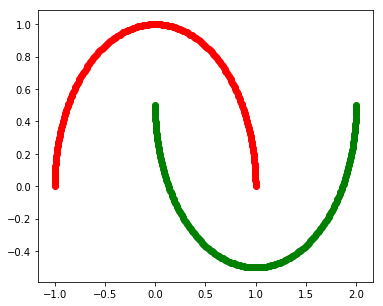

In [5]:
fig = plt.figure(figsize=(6, 5))

for k in range(k_labels):
    cluster = X[np.where(y == k)]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[k])

fig.savefig('moons')

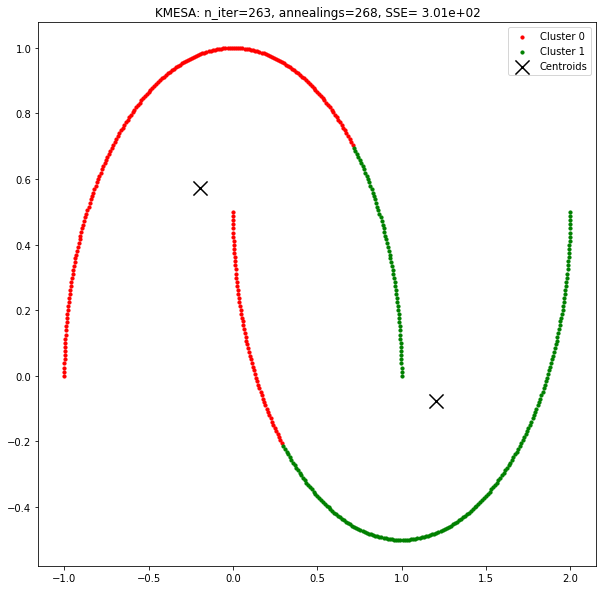


random annealing:
------------- KMESA clustering -------------
    * Iterations before convergence: 263
    * Total empty cluster resolutions: 0
    * Total annealings: 268
    * Sum of squared error:  3.01e+02
    * Time elapsed: 12s 444ms
 ---------------------------------------------

max annealing:
------------- KMESA clustering -------------
    * Iterations before convergence: 248
    * Total empty cluster resolutions: 0
    * Total annealings: 269
    * Sum of squared error:  3.01e+02
    * Time elapsed: 8s 947ms
 ---------------------------------------------

min annealing:
------------- KMESA clustering -------------
    * Iterations before convergence: 175
    * Total empty cluster resolutions: 0
    * Total annealings: 212
    * Sum of squared error:  3.04e+02
    * Time elapsed: 5s 22ms
 ---------------------------------------------

cluster_own annealing:
------------- KMESA clustering -------------
    * Iterations before convergence: 276
    * Total empty cluster resolu

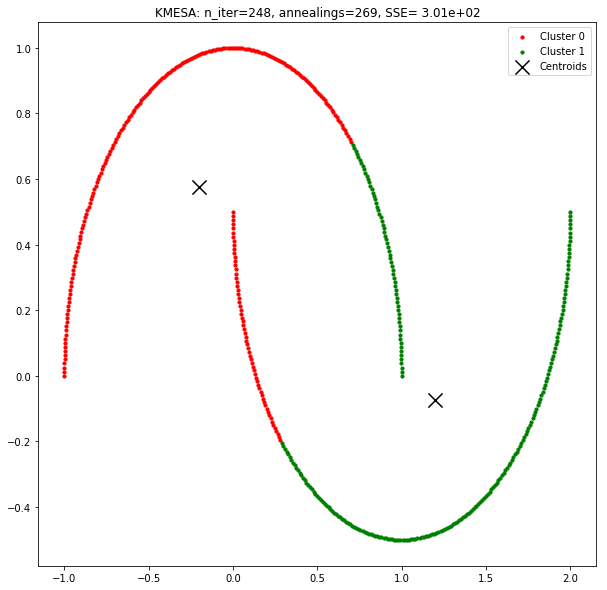

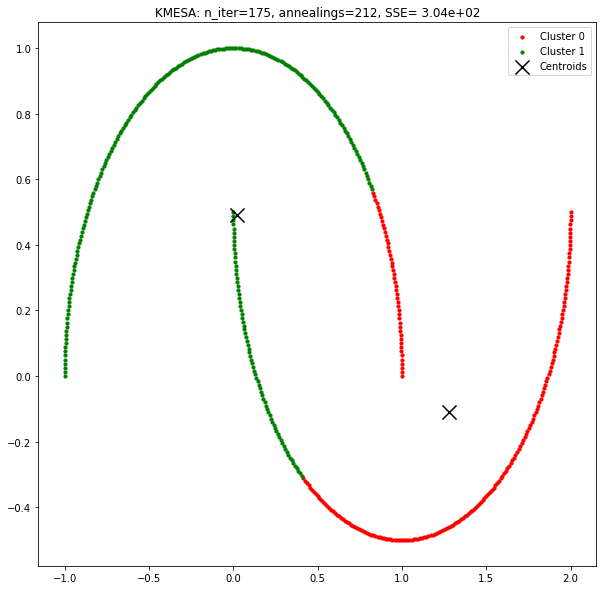

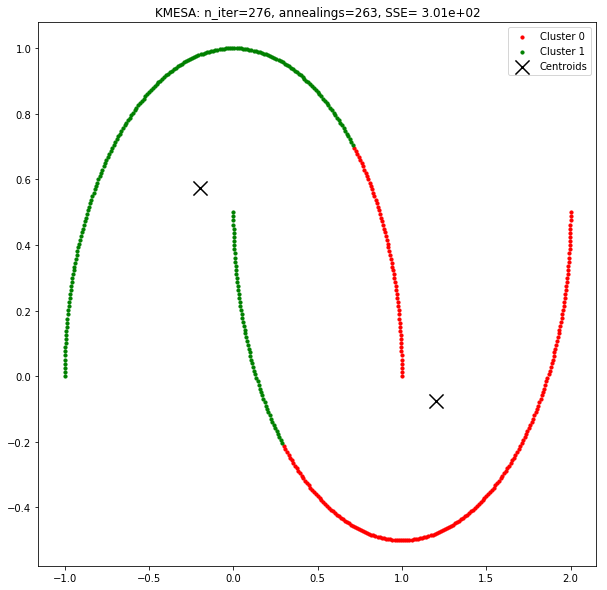

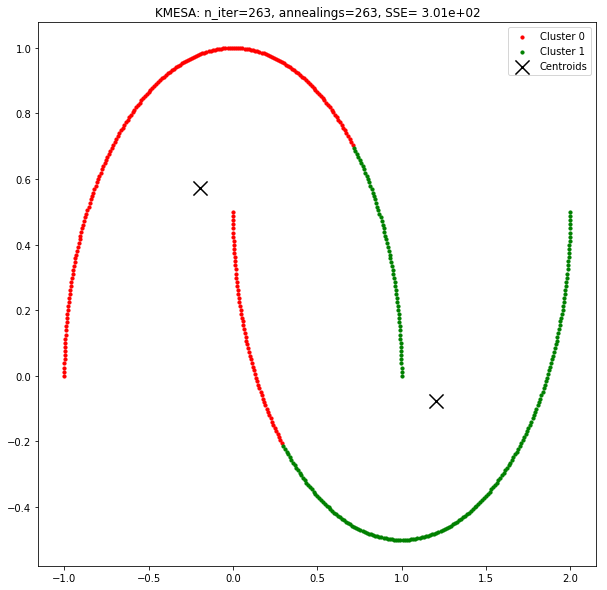

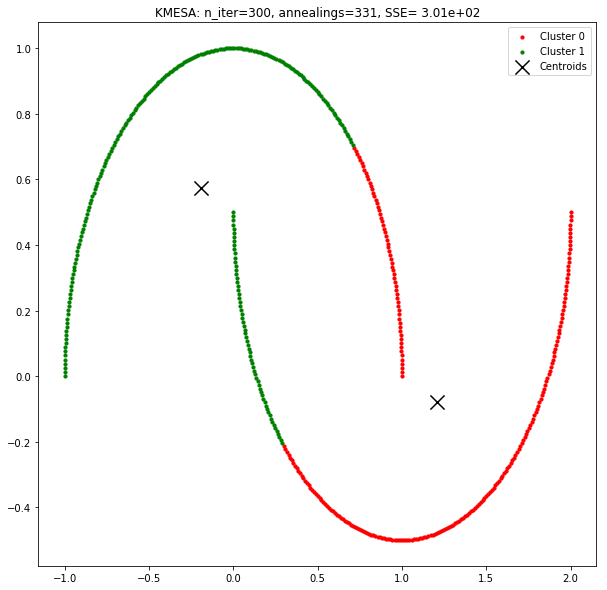

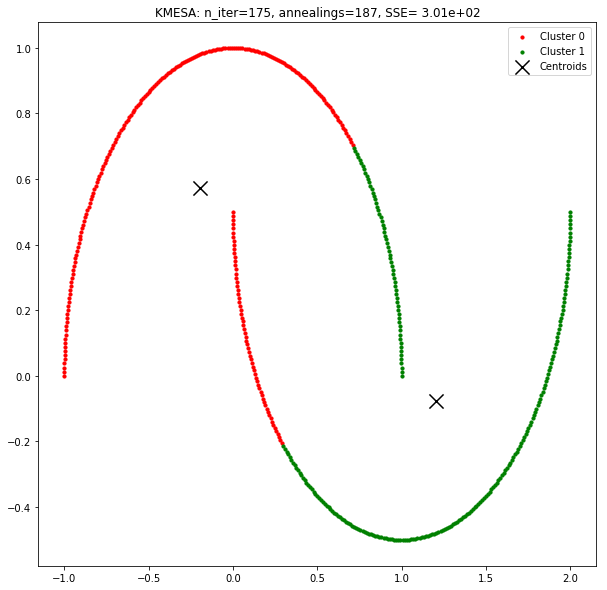

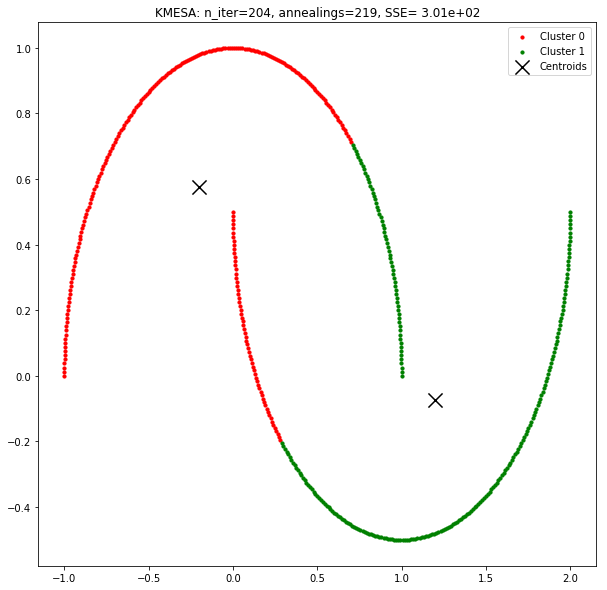

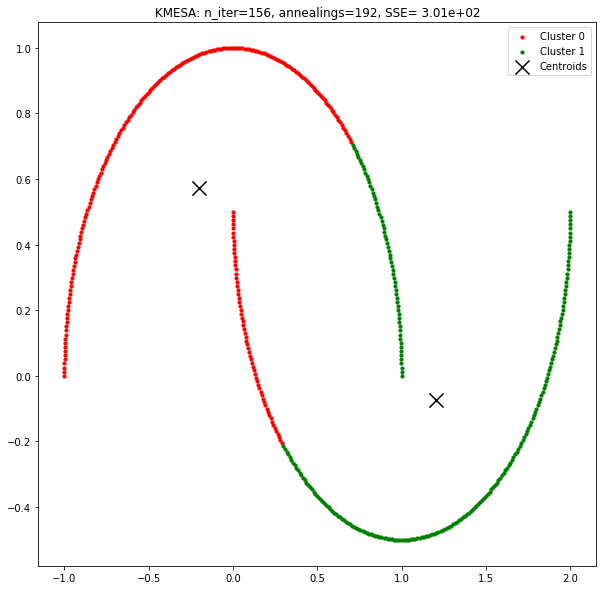

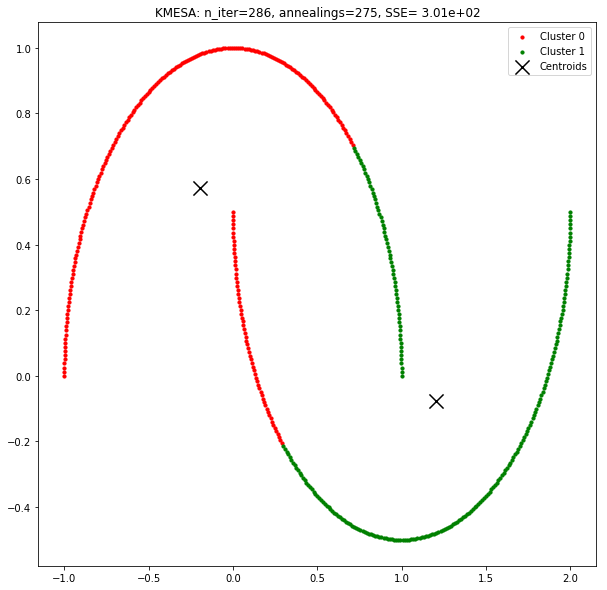

In [7]:
methods = ['random', 'max', 'min', 'cluster_own', 'cluster_other', 'cluster_mean',
           'centroid_split', 'centroid_gather', 'maxmin', 'carousel']
labels = []
inertias = []
centroids = []

for method in methods:
    est = KMESA(k_clusters=2,
             n_init=3,
             tol=1e-3,
             annealing_method=method,
             annealing_prob_function='log',
             alpha=10,
             annealing_weight_function='sigmoid',
             beta=40,
             convergence_tracking=True,
             annealing_tracking=True,
             )
    est.fit(X)
    est.plot_clustered_data(X, out_file=f'KMESA_moons_method={method}')

    labels.append(est.labels_)
    inertias.append(est.inertia_)

    print(f'\n{method} annealing:')
    est.print_clustering_info()

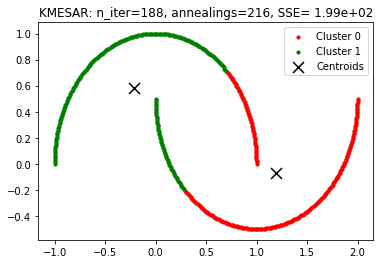

------------- KMESAR clustering -------------
    * Iterations before convergence: 188
    * Total empty cluster resolutions: 0
    * Total annealings: 216
    * Sum of squared error:  1.99e+02
    * Time elapsed: 2s 182ms
 ---------------------------------------------


In [5]:
best_index = np.argmin(inertias)
best_labels = labels[best_index]
colors = ['red', 'green', 'blue', 'gold', 'm', 'brown', 'purple', 'teal']

for label in range(7):
    cluster = X[np.where(best_labels == label)]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[label])